In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 18.5 MB/s eta 0:00:00


In [ ]:
pip install transformers pandas openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import nltk
plt.style.use('ggplot')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Read in data
df1 = pd.read_csv('/Train.csv')
df1.insert(0, 'ID', range(1, len(df1) + 1))
df1 = df1.set_index('ID').reset_index()

In [ ]:
df1['Comments'] = df1['Rating Tags'].fillna('').astype(str) + ' ' + df1['Comment'].fillna('').astype(str)
df1 = df1[['ID','Store', 'Date Ordered', 'Order ID', 'External Store ID', 'Rating Value', 'Rating Type', 'Rating Tags', 'Comment','Comments','Rating Date']]
df1= df1[df1['Rating Type']== 'consumer_to_merchant']

In [ ]:
df3 = df1[df1['Comments'].apply(lambda x: isinstance(x, str) and len(x.strip()) <= 0)]

In [ ]:
def set_tone(value):
    if value == 5 or value == 4:
        return 'Positive'
    elif value == 3:
        return 'Neutral'
    else:
        return 'Negative'

df3['Tone'] = df3['Rating Value'].apply(set_tone)

<ipython-input-77-d2a1f085c338>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Tone'] = df3['Rating Value'].apply(set_tone)


In [ ]:
df3['Discount'] = '$0'
df3['roberta_sum'] = 0

<ipython-input-78-e1aba9c2d107>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Discount'] = 0
<ipython-input-78-e1aba9c2d107>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['roberta_sum'] = 0
<ipython-input-78-e1aba9c2d107>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [ ]:
def map_ratings_to_stars(rating):
    if rating == 1:
        return '1-star'
    elif rating == 2:
        return '2-star'
    elif rating == 3:
        return '3-star'
    elif rating == 4:
        return '4-star'
    elif rating == 5:
        return '5-star'
    else:
        return None

df3['category'] = df3['Rating Value'].apply(map_ratings_to_stars)

In [ ]:
df3.head()

,ID,Store,Date Ordered,Order ID,External Store ID,Rating Value,Rating Type,Rating Tags,Comment,Comments,Rating Date,Tone,Discount,roberta_sum,category
2,3,Rebel Wings (BAL09-1),2023-03-17,59AD6,BAL09-1,5,consumer_to_merchant,NaN,NaN,,2023-03-18,Positive,0,0,Other
5,6,Wendy's (2197 Riverside Drive),2023-03-17,8DC3E,OTT01-1,5,consumer_to_merchant,NaN,NaN,,2023-03-17,Positive,0,0,Other
10,11,Vegan vs Fries (SEA03-1),2023-03-17,9F0D0,SEA03-1,5,consumer_to_merchant,NaN,NaN,,2023-03-18,Positive,0,0,Other
13,14,Stock-Up Mart (ATL41-1),2023-03-17,0BD6A,ATL41-1,4,consumer_to_merchant,NaN,NaN,,2023-03-19,Positive,0,0,Other
14,15,Pei Wei (MIA28-1),2023-03-17,74F6F,MIA28-1,5,consumer_to_merchant,NaN,NaN,,2023-03-18,Positive,0,0,Other


In [ ]:
import random

responses = {
   1: ["We're sorry to hear that you had a poor experience with us. We would like to make things right and improve our food in any way we can. Please contact us directly so we can address your concerns.", "We apologize for falling short of your expectations. Your feedback is valuable to us and we will take steps to improve our food. Thank you for bringing this to our attention.", "We're sorry that we didn't meet your expectations. We take your feedback seriously and will use it to make necessary improvements. Please reach out to us directly if you would like to discuss your experience further.", "We apologize for the experience you had with us. We will investigate the issue and take action to ensure it does not happen again. Thank you for your feedback and for helping us improve our food", "We're sorry that we let you down. We value your feedback and will take steps to improve our food to meet your expectations in the future. Thanks for the feedback"],
   2: ["We're sorry that your experience with us fell short of your expectations. We appreciate your feedback and will take steps to improve our food. Please let us know if there is anything we can do to make things right.", "We apologize that we didn't provide the level of food you expected. Your feedback is important to us and we will use it to improve. Thank you for bringing this to our attention.", "We're sorry that we didn't fully meet your expectations. Your feedback is valuable to us and we will use it to make necessary improvements. Thank you for bringing this to our attention.", "We apologize that we fell short of your expectations. We will investigate the issue and take action to ensure it does not happen again. Thank you for your feedback and for helping us improve our food.", "Hi, sorry you didn't enjoy your experience with us. Thanks for the feedback. I went ahead and sent you a discount for the next order. We hope you can give us another opportunity to serve you :)"],
   3: ["Thank you for your feedback. We're sorry that your experience with us was not perfect. We take your comments into account as we work to improve our food.", "We appreciate your feedback and apologize for not meeting your expectations. Your feedback is valuable to us and we will use it to make necessary improvements. Thank you for bringing this to our attention.", "We're sorry that we didn't exceed your expectations. We value your feedback and will take steps to improve our food. Thank you for bringing this to our attention.", "Thank you for taking the time to share your experience with us. We're sorry that we fell short of your expectations. We will use your feedback to improve our food.", "We appreciate your feedback and apologize for not meeting your expectations. Your comments will help us improve and provide better food in the future."],
   4: ["Thank you for your feedback. We're glad that you had a good experience with us and we will use your comments to continue to provide quality food.", "we're pleased to hear that you enjoyed your experience with us. Thank you for your feedback and for choosing our food.', 'Thank you for taking the time to share your experience with us. we're glad that you had a positive experience and we will use your feedback to continue to improve our food.", "we're delighted to hear that you enjoyed your experience with us. Your feedback is appreciated and we hope to serve you again in the future.','Thank you for your feedback. we're pleased to hear that you had a great experience with us overall. We will use your comments to improve our food and provide an even better experience in the future."],
   5: ["We're thrilled to hear that you had an excellent experience with us. Thank you for your feedback and for choosing our food. We look forward to serving you again in the future.", "Thank you for taking the time to share your positive experience with us. We're delighted that we met or exceeded your expectations, and we will strive to provide the same level of food in the future.", "We're delighted to hear that you had a great experience with us. Thank you for your feedback and for choosing our food. We hope to continue to exceed your expectations in the future.", "Thank you for your feedback. We're thrilled that you had such a positive experience with us, and we will use your comments to continue to provide top-notch food.", "We're thrilled to hear that you had an amazing experience with us. Thank you for your feedback and for choosing our food. We will use your comments to continue to improve and provide even better food in the future."]
}

for index, row in df3.iterrows():
    rating = row['Rating Value']
    if rating == 1:
        response = random.choice(responses[1])
    elif rating == 2:
        response = random.choice(responses[2])
    elif rating == 3:
        response = random.choice(responses[3])
    elif rating == 4:
        response = random.choice(responses[4])
    else:
        response = random.choice(responses[5])
    df3.loc[index, 'Response'] = response[:200] 

<ipython-input-80-6d99ed32865e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[index, 'Response'] = response[:200]


In [ ]:
df3.head()

,ID,Store,Date Ordered,Order ID,External Store ID,Rating Value,Rating Type,Rating Tags,Comment,Comments,Rating Date,Tone,Discount,roberta_sum,category,Response
2,3,Rebel Wings (BAL09-1),2023-03-17,59AD6,BAL09-1,5,consumer_to_merchant,NaN,NaN,,2023-03-18,Positive,0,0,Other,We're delighted to hear that you had a great e...
5,6,Wendy's (2197 Riverside Drive),2023-03-17,8DC3E,OTT01-1,5,consumer_to_merchant,NaN,NaN,,2023-03-17,Positive,0,0,Other,We're thrilled to hear that you had an excelle...
10,11,Vegan vs Fries (SEA03-1),2023-03-17,9F0D0,SEA03-1,5,consumer_to_merchant,NaN,NaN,,2023-03-18,Positive,0,0,Other,We're delighted to hear that you had a great e...
13,14,Stock-Up Mart (ATL41-1),2023-03-17,0BD6A,ATL41-1,4,consumer_to_merchant,NaN,NaN,,2023-03-19,Positive,0,0,Other,Thank you for your feedback. We're glad that y...
14,15,Pei Wei (MIA28-1),2023-03-17,74F6F,MIA28-1,5,consumer_to_merchant,NaN,NaN,,2023-03-18,Positive,0,0,Other,We're delighted to hear that you had a great e...


In [ ]:
df2 = df1[df1['Comments'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)]

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    text = row['Comments']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/609 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df2, how='left')

In [ ]:
vaders.tail()

,ID,neg,neu,pos,compound,Store,Date Ordered,Order ID,External Store ID,Rating Value,Rating Type,Rating Tags,Comment,Comments,Rating Date
604,4085,0.000,1.000,0.0,0.0000,Man vs Fries (SEA07-1),2023-03-12,30355,SEA07-1,1,consumer_to_merchant,restaurant_not_tasty,NaN,restaurant_not_tasty,2023-03-12
605,4096,0.000,1.000,0.0,0.0000,Capriotti's Sandwich Shop (PHX09-1),2023-03-16,09C18,PHX09-2,1,consumer_to_merchant,restaurant_not_tasty,NaN,restaurant_not_tasty,2023-03-16
606,4102,0.000,1.000,0.0,0.0000,Crepe Delicious (VAN10-1),2023-03-15,7083A,VAN10-1,3,consumer_to_merchant,restaurant_missed_request,NaN,restaurant_missed_request,2023-03-15
607,4113,0.000,1.000,0.0,0.0000,Wendy's - Deptford,2023-03-16,75276,LDN-263-EK01,5,consumer_to_merchant,restaurant_hidden_gem,NaN,restaurant_hidden_gem,2023-03-16
608,4115,0.307,0.693,0.0,-0.4767,Umami Burger (SEA12-1),2023-03-15,3C233,SEA12-1,3,consumer_to_merchant,restaurant_not_tasty,the bulk of my order was wrong.,restaurant_not_tasty the bulk of my order was ...,2023-03-16


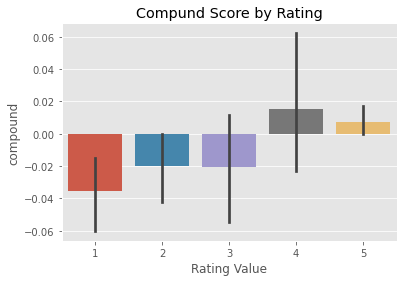

In [ ]:
ax = sns.barplot(data=vaders, x='Rating Value', y='compound')
ax.set_title('Compund Score by Rating')
plt.show()

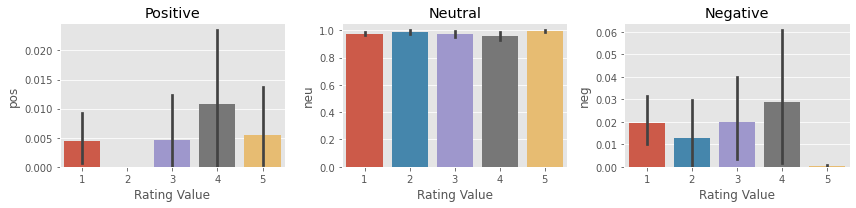

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating Value', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating Value', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating Value', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
example ="Ordered 2 burgers and a large fries. BurgerFi DID NOT PUT MY FRIES IN THE BAG!!! EXTREMELY DISAPPOINTED!!! Driver was very nice. It was not her fault. I will not order from BurgerFi again. There was also no phone number for the location that the food came from and I couldn’t find BurgerFi at the address that was listed. Very upsetting not to be able to reach those responsible for this mistake."
print(example)

Ordered 2 burgers and a large fries. BurgerFi DID NOT PUT MY FRIES IN THE BAG!!! EXTREMELY DISAPPOINTED!!! Driver was very nice. It was not her fault. I will not order from BurgerFi again. There was also no phone number for the location that the food came from and I couldn’t find BurgerFi at the address that was listed. Very upsetting not to be able to reach those responsible for this mistake.


In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.8566384, 'roberta_neu': 0.11899765, 'roberta_pos': 0.024363983}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = row['Comments']
        myid = row['ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/609 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'ID'})
results_df = results_df.merge(df2, how='left')

In [ ]:
results_df['roberta_neg'] = results_df['roberta_neg'] * -1
results_df['roberta_sum'] = results_df['roberta_neg'] + results_df['roberta_neu'] + results_df['roberta_pos']
results_df = results_df[['Store', 'Date Ordered', 'Order ID', 'External Store ID', 'Rating Value', 'Rating Type', 'Rating Tags', 'Comment','Comments','Rating Date','roberta_sum']]
df3['Discount'] = 0

<ipython-input-116-9bd0a83becbd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Discount'] = 0


,Store,Date Ordered,Order ID,External Store ID,Rating Value,Rating Type,Rating Tags,Comment,Comments,Rating Date,roberta_sum
0,MrBeast Burger (PHX01-1),2023-03-17,3DBF6,PHX01-1,5,consumer_to_merchant,"restaurant_sustainable_packaging, restaurant_h...",NaN,"restaurant_sustainable_packaging, restaurant_h...",2023-03-17,0.983963
1,Via Cibo (Yonge St.),2023-03-17,A359C,TOR18-2,1,consumer_to_merchant,NaN,you gave me spaghetti and meatballs after I or...,you gave me spaghetti and meatballs after I o...,2023-03-18,-0.927082
2,MrBeast Burger (ATL67-1),2023-03-17,B379D,ATL67-1,3,consumer_to_merchant,"restaurant_not_worth_price, restaurant_not_tasty",NaN,"restaurant_not_worth_price, restaurant_not_tasty",2023-03-18,-0.811475
3,800 Degrees Pizza (SAN02-1),2023-03-17,6F77D,SAN02-1,5,consumer_to_merchant,"restaurant_large_portions, restaurant_high-qua...",NaN,"restaurant_large_portions, restaurant_high-qua...",2023-03-18,0.989730
4,Wendy's - London Bridge,2023-03-17,9D8A5,LDN-297-BK01,4,consumer_to_merchant,restaurant_not_tasty,NaN,restaurant_not_tasty,2023-03-18,-0.666354


In [ ]:
responses = {
   "<-0.70": {
       1: ["We're sorry to hear that your experience with us was less than satisfactory. We take your feedback seriously and would like to investigate the matter further to understand what went wrong. Please be assured that we will address your concerns with the team and take steps to improve our food experience. We would like to offer you a discount on your next order as a gesture of goodwill, and we hope to have the opportunity to serve you better in the future.", "We're disappointed to hear that we didn't meet your expectations, and we apologize for any inconvenience caused. We appreciate you taking the time to share your feedback with us and will use it to improve our food experience. Please know that we take your concerns seriously and will address them with the team. We would like to offer you a discount on your next order to show our commitment to providing you with a better experience.", "Thank you for bringing this to our attention, and we're sorry to hear that your experience with us was unsatisfactory. We strive to provide the best possible food experience to our customers, and we regret that we fell short of your expectations. We value your feedback and will take steps to improve our food experience. As a token of our appreciation for your business and feedback, we would like to offer you a discount on your next order.", "We're sorry to hear that your experience with us was disappointing. We take your feedback seriously and will investigate the matter further to understand what went wrong. We appreciate your patience as we work to address the issues you have raised with our team. As a gesture of goodwill, we would like to offer you a discount on your next order. We hope that you will give us another opportunity to serve you better in the future.", "We're sorry to hear that your experience with us fell short of your expectations, and we apologize for any inconvenience caused. We appreciate you bringing this to our attention and will take steps to ensure that similar issues do not occur in the future. We value your business and would like to offer you a discount on your next order as a token of our appreciation. We hope that you will give us another chance to provide you with a better experience."],
       2: ["Thank you for your feedback, and we're sorry to hear that your experience with us was not up to our usual standards. We appreciate you bringing this to our attention and will investigate the matter further. Please know that we take your concerns seriously and will work to address them with the team. As a token of our appreciation for your business and feedback, we would like to offer you a discount on your next order.", "We're sorry to hear that we didn't meet your expectations, and we apologize for any inconvenience caused. We appreciate your feedback and will take steps to improve our food experience. Please know that we value your business and would like to offer you a discount on your next order as a gesture of goodwill. We hope that you will give us another chance to provide you with a better experience.","We're sorry to hear that your experience with us was disappointing. We take your feedback seriously and will work to identify areas where we can improve our food experience. We appreciate your patience as we address the issues you have raised with the team. As a gesture of goodwill, we would like to offer you a discount on your next order. We hope that you will consider giving us another chance to provide you with a better experience.","We're sorry to hear that we fell short of your expectations during your recent visit. Your feedback is important to us, and we appreciate you taking the time to share your experience. We're committed to providing excellent food experience to our customers and will work to ensure that your concerns are addressed. To show our appreciation for your feedback and to make it up to you, we would like to offer you a discount on your next order. We hope you'll give us another chance to provide you with a better experience.", "We're sorry to hear that your experience with us was not up to our usual standards. We strive to provide excellent food experience to our customers, and we're disappointed that we fell short in your case. Your feedback is important to us, and we will use it to improve our food experience. We would like to offer you a discount on your next order as a gesture of goodwill. We hope you'll give us another opportunity to serve you better in the future."],
       3: ["Thank you for taking the time to share your feedback with us. We're sorry to hear that your experience with us fell short of your expectations. We take all feedback seriously and will use it to improve our food experience. To show our appreciation for your business, we would like to offer you a discount on your next order. We hope you'll consider giving us another chance to exceed your expectations.","We're sorry to hear that your recent experience with us didn't meet your expectations. We appreciate your feedback and will use it to improve our food experience. As a gesture of goodwill, we would like to offer you a discount on your next order. We hope you'll give us another opportunity to provide you with a better experience.","Thank you for your feedback. We're sorry to hear that your experience with us was not up to our usual standards. We take your concerns seriously and will work to improve our food experience. To show our commitment to providing you with a better experience, we would like to offer you a discount on your next order. We hope you'll give us another chance to exceed your expectations.","We apologize for any inconvenience you may have experienced during your recent visit. We appreciate your feedback and will use it to improve our food experience. As a token of our appreciation for your business, we would like to offer you a discount on your next order. We hope you'll consider giving us another chance to provide you with a better experience.","Thank you for your honest feedback. We're sorry to hear that your experience with us was not what you expected. We take all feedback seriously and will use it to improve our food experience. To show our commitment to providing you with a better experience, we would like to offer you a discount on your next order. We hope you'll give us another chance to exceed your expectations."],
       4: ["Thank you for your positive review and for choosing our business. We're thrilled to hear that you had a great experience with us. While we're happy to see that we met your expectations, we're always looking for ways to improve our food experience. Your feedback is greatly appreciated, and we'll take it into consideration as we continue to provide exceptional food experience to our customers. As a thank you for your support, we'd like to offer you a discount on your next order. We hope to see you again soon!","We're grateful for your feedback and are delighted to hear that you had a positive experience with us. Your comments are valuable, and we'll make sure to pass them along to our team to continue providing great food experience. As a gesture of our appreciation, we'd like to offer you a discount on your next order. Thank you for choosing our business, and we look forward to serving you again soon!","Thank you for taking the time to leave a review. We're thrilled to hear that you had a great experience with us, and we appreciate your feedback on areas where we can improve. We take all feedback seriously and will work to address any concerns you've raised with our team. As a thank you for your support, we'd like to offer you a discount on your next order. We look forward to serving you again and providing you with an even better experience.","We're happy to hear that you enjoyed our food experience and appreciate your feedback on how we can improve. Your comments will help us continue to provide excellent food experience to our customers. As a token of our appreciation, we'd like to offer you a discount on your next order. Thank you for your support, and we hope to see you again soon!","Thank you for choosing our business and for taking the time to share your experience. We're pleased to see that you had a positive experience with us. Your feedback is valuable, and we'll use it to improve our food experience even further. As a thank you for your support, we'd like to offer you a discount on your next order. We hope to continue serving you and providing you with excellent food experience."],
       5: ["We're thrilled to hear that you had a positive experience overall, but we apologize for any inconvenience caused by the issue you encountered. We take all feedback seriously, and we want to make it right. As a token of our appreciation for your feedback, we would like to offer you a discount on your next order. We look forward to serving you again soon and providing you with an even better experience.","We're glad to hear that you enjoyed your experience with us, but we're sorry to hear that there was an issue. We strive to provide the best possible food experience to all of our customers, and we want to make sure that you're completely satisfied. As a gesture of our commitment to quality food experience, we would like to offer you a discount on your next order. We hope to have the opportunity to serve you again soon.","Thank you so much for your positive feedback and for choosing our food experiences. We're thrilled to hear that you had a great experience with us. We strive to provide the best possible food experience to all of our customers and we're glad that we were able to meet your expectations. As a token of our appreciation, we would like to offer you a discount on your next order. We can't wait to serve you again and provide you with another excellent experience.","We're glad to hear that you had a positive experience with us, but we're sorry to hear that there was an issue that detracted from your experience. We take all feedback seriously, and we want to make sure that we address any concerns you may have. To show our commitment to quality food experience, we would like to offer you a discount on your next order. We hope to have the opportunity to serve you again and provide you with an even better experience.","Thank you for taking the time to leave a positive review, and we're sorry to hear that there was an issue with your order. We take all feedback seriously, and we want to make sure that our customers are completely satisfied. As a token of our appreciation for your feedback, we would like to offer you a discount on your next order. We hope to have the opportunity to provide you with another great experience and address any concerns you may have."]
   },
   "(-0.70-0.0)": {
       1: ["We're sorry to hear that your experience with us was less than satisfactory. We take your feedback seriously and would like to investigate the matter further to understand what went wrong. Please be assured that we will address your concerns with the team and take steps to improve our food experience. We hope to have the opportunity to serve you better in the future.", "We're disappointed to hear that we didn't meet your expectations, and we apologize for any inconvenience caused. We appreciate you taking the time to share your feedback with us and will use it to improve our food experience. Please know that we take your concerns seriously and will address them with the team. We are committed to providing you with a better experience in the future.", "Thank you for bringing this to our attention, and we're sorry to hear that your experience with us was unsatisfactory. We strive to provide the best possible food experience to our customers, and we regret that we fell short of your expectations. We value your feedback and will take steps to improve our food experience. We hope that you will give us another opportunity to serve you better.", "We're sorry to hear that your experience with us was disappointing. We take your feedback seriously and will investigate the matter further to understand what went wrong. We appreciate your patience as we work to address the issues you have raised with our team. We hope that you will give us another opportunity to provide you with a better experience in the future.", "We're sorry to hear that your experience with us fell short of your expectations, and we apologize for any inconvenience caused. We appreciate you bringing this to our attention and will take steps to ensure that similar issues do not occur in the future. We value your business and are committed to providing you with a better experience in the future."],
       2: ["Thank you for your feedback, and we're sorry to hear that your experience with us was not up to our usual standards. We appreciate you bringing this to our attention and will investigate the matter further. Please know that we take your concerns seriously and will work to address them with the team. We value your business and hope to have the opportunity to serve you again in the future with a better experience.", "We're sorry to hear that we didn't meet your expectations, and we apologize for any inconvenience caused. We appreciate your feedback and will take steps to improve our food experience. Please know that we value your business and hope that you will give us another chance to provide you with a better experience in the future.", "We're sorry to hear that your experience with us was disappointing. We take your feedback seriously and will work to identify areas where we can improve our food experience. We appreciate your patience as we address the issues you have raised with the team. We value your business and hope to have the opportunity to serve you again in the future with a better experience.", "We're sorry to hear that we fell short of your expectations during your recent visit. Your feedback is important to us, and we appreciate you taking the time to share your experience. We're committed to providing excellent food experience to our customers and will work to ensure that your concerns are addressed. We hope that you will give us another chance to provide you with a better experience in the future.", "We're sorry to hear that your experience with us was not up to our usual standards. We strive to provide excellent food experience to our customers, and we're disappointed that we fell short in your case. Your feedback is important to us, and we will use it to improve our food experience. We hope you'll give us another opportunity to serve you better in the future."],      
       3: ["Thank you for taking the time to share your feedback with us. We're sorry to hear that we fell short of your expectations. We take all feedback seriously and will use it to improve our food experience. We hope you'll consider giving us another chance to provide you with a better experience.","We appreciate your feedback and apologize that your recent experience with us didn't meet your expectations. We are committed to improving our food experience and will take your concerns into consideration. We hope you'll give us another opportunity to exceed your expectations.","Thank you for bringing your concerns to our attention. We are sorry to hear that we did not meet our usual standards during your visit. We take all feedback seriously and will work to improve our food experience. We hope you'll give us another chance to provide you with a better experience.","We apologize for any inconvenience you may have experienced during your recent visit. Your feedback is important to us and we will use it to improve our food experience. We hope you'll give us another opportunity to exceed your expectations.","Thank you for your honest feedback. We're sorry to hear that your experience with us was not what you expected. We take all feedback seriously and will use it to improve our food experience. We hope you'll give us another chance to provide you with a better experience."],
       4: ["Thank you for taking the time to share your feedback with us. We're sorry to hear that your experience with us fell short of your expectations. We take all feedback seriously and will use it to improve our food experience. To show our commitment to providing our customers with a better experience, we'll be looking into the issue you've raised and working to address it. We hope you'll consider giving us another chance to exceed your expectations.","We're sorry to hear that your recent experience with us didn't meet your expectations. We appreciate your feedback and take all concerns seriously. We're committed to improving our food experience and will be reviewing your feedback to identify areas where we can make improvements. Thank you for bringing this to our attention, and we hope to have the opportunity to serve you better in the future.","Thank you for your feedback. We're sorry to hear that your experience with us was not up to our usual standards. We take your concerns seriously and will work to improve our food experience. We appreciate the opportunity to learn and grow, and we hope to have the chance to exceed your expectations in the future.","We apologize for any inconvenience you may have experienced during your recent visit. We appreciate your feedback and take all concerns seriously. We'll be reviewing your feedback to identify areas where we can make improvements to our food experience. Thank you for bringing this to our attention, and we hope to have the opportunity to serve you better in the future.","Thank you for your honest feedback. We're sorry to hear that your experience with us was not what you expected. We take all feedback seriously and will work to improve our food experience. We appreciate the opportunity to learn and grow, and we hope to have the chance to exceed your expectations in the future."],
       5: ["Thank you for your feedback. We're glad to hear that you had a positive experience with us, and we appreciate your suggestions for improvement. We will take them into consideration as we continue to provide excellent food experience to our customers. Thank you for choosing our business, and we look forward to serving you again soon.","We're sorry to hear that your experience with us was not up to your expectations. We take all feedback seriously, and we want to ensure that our customers receive the best possible food experience. We will review your comments with our team to identify areas for improvement. Thank you for bringing this to our attention, and we hope to have the opportunity to serve you again and exceed your expectations.","Thank you for taking the time to share your experience with us. We're glad to hear that you enjoyed our food experience, and we appreciate your feedback on areas where we can improve. We take all feedback seriously, and we will work to address any concerns you've raised with our team. Thank you for choosing our business, and we hope to see you again soon.","We're happy to hear that you enjoyed our food experience and appreciate your feedback on how we can improve. Your comments will help us continue to provide excellent food experience to our customers. Thank you for your support, and we hope to see you again soon!","We're glad to hear that you had a positive experience with us overall, but we apologize for any inconvenience caused by the issue you encountered. We take all feedback seriously, and we want to make sure that we address any concerns you may have. Thank you for bringing this to our attention, and we hope to have the opportunity to serve you again and provide you with an even better experience."]
   },
    "(0.0-0.5)": {
       1: ["We are truly sorry to hear that your recent food order did not meet your expectations. We understand how frustrating that can be, and we want to make it right. Please reach out to us so we can learn more about your experience and work to address any issues. Thank you for bringing this to our attention.","We apologize for the poor experience you had with your recent food order. We strive to provide the best possible service to our customers, and it's clear that we fell short in this instance. We appreciate your feedback and will take it into consideration as we work to improve our service.","We're sorry to hear that your recent food order was not up to par. We take your feedback seriously and will use it to improve our service going forward. Thank you for bringing this to our attention and giving us the opportunity to make things right.","We are disappointed to hear that your recent food order did not meet your expectations. We take pride in our food and service, and we apologize for falling short in your case. Please reach out to us so we can learn more about your experience and work to address any issues.","We apologize for the negative experience you had with your recent food order. We value your feedback and will use it to improve our service. Thank you for giving us the opportunity to make things right."],
       2: ["We apologize that your recent food order did not meet your expectations. We appreciate your feedback and will take it into consideration as we work to improve our service. If you have any additional feedback or concerns, please don't hesitate to reach out to us.","We're sorry to hear that your recent food order was not up to our usual standards. We take our food quality and service very seriously, and we apologize for falling short in your case. Please know that we will do everything we can to improve and provide you with a better experience in the future.","We apologize for any inconvenience caused by your recent food order. We appreciate your feedback and will use it to improve our service. We hope to have the opportunity to serve you again and provide you with a better experience.","We're sorry to hear that your recent food order did not meet your expectations. We take your feedback seriously and will use it to improve our service going forward. If there's anything else we can do to address your concerns, please let us know.","We apologize that your recent food order fell short of your expectations. We appreciate your feedback and will work to improve the areas that need attention. Thank you for bringing this to our attention, and we hope to have the opportunity to serve you again in the future."],
       3: ["Thank you for taking the time to share your feedback with us. We're sorry to hear that your recent food order didn't meet your expectations. We appreciate your feedback and will use it to improve our service. We hope to have the opportunity to serve you again and provide you with a better experience.","We're sorry to hear that your recent food order was not up to our usual standards. We take your feedback seriously and will work to address the areas that need attention. Thank you for bringing this to our attention, and we hope to have the opportunity to serve you again in the future.","We apologize that your recent food order fell short of your expectations. We appreciate your feedback and will use it to improve our service. We hope to have the chance to serve you again and provide you with a better experience.","We're sorry that your recent food order didn't meet your expectations. We take all feedback seriously and will use it to improve our service. Thank you for taking the time to share your thoughts with us, and we hope to have the opportunity to serve you again in the future.","We apologize that your recent food order wasn't the best experience. We appreciate your feedback and will work to make improvements to our service. We hope to have the chance to serve you again and provide you with a better experience."],
       4: ["Thank you for taking the time to leave your feedback about your recent food order. We're glad to hear that you had a good experience overall, but we are always striving to improve. We appreciate your input and will use it to make sure that we continue to provide excellent service and quality food.","We're pleased to hear that your recent food order was enjoyable, but we understand that there may be areas where we can still improve. Thank you for sharing your feedback with us, and we will use it to continue to provide excellent service to our customers.","We're happy to hear that your recent food order was mostly enjoyable. We appreciate your feedback and will use it to make improvements where necessary. Thank you for choosing us, and we hope to have the opportunity to serve you again soon.","Thank you for sharing your thoughts on your recent food order. We're glad to hear that you had a positive experience overall, but we also understand that there may be areas for improvement. We appreciate your feedback and will use it to continue providing great service and delicious food.","We're happy to hear that your recent food order was mostly satisfactory. We take all feedback seriously and will use it to improve our service. Thank you for your input, and we hope to have the opportunity to serve you again in the future."],
       5: ["Thank you for taking the time to share your positive experience with us. We're thrilled to hear that you enjoyed your recent food order, and we appreciate your kind words. Our team works hard to provide great service and delicious food, and we're glad to see it paid off.","We're so glad to hear that your recent food order exceeded your expectations. Thank you for choosing us, and we appreciate your support. We hope to have the opportunity to serve you again soon.","We're pleased to hear that your recent food order was a success. We take pride in providing high-quality service and delicious food to our customers, and we're glad that you enjoyed it. Thank you for your kind words, and we hope to see you again soon.","Thank you for leaving a 5-star rating for your recent food order. We're happy to hear that we were able to provide you with a great experience. We appreciate your feedback and will continue to strive for excellence.","We're delighted to hear that your recent food order met your expectations. We take customer satisfaction seriously and are thrilled that you enjoyed our food and service. Thank you for choosing us, and we look forward to serving you again in the future."]
   },
   "(0.5-1.0)": {
       1: ["We are truly sorry to hear that your recent food order did not meet your expectations. We understand how frustrating that can be, and we want to make it right. Please reach out to us so we can learn more about your experience and work to address any issues. Thank you for bringing this to our attention.","We apologize for the poor experience you had with your recent food order. We strive to provide the best possible service to our customers, and it's clear that we fell short in this instance. We appreciate your feedback and will take it into consideration as we work to improve our service.","We're sorry to hear that your recent food order was not up to par. We take your feedback seriously and will use it to improve our service going forward. Thank you for bringing this to our attention and giving us the opportunity to make things right.","We are disappointed to hear that your recent food order did not meet your expectations. We take pride in our food and service, and we apologize for falling short in your case. Please reach out to us so we can learn more about your experience and work to address any issues.","We apologize for the negative experience you had with your recent food order. We value your feedback and will use it to improve our service. Thank you for giving us the opportunity to make things right."],
       2: ["We apologize that your recent food order did not meet your expectations. We appreciate your feedback and will take it into consideration as we work to improve our service. If you have any additional feedback or concerns, please don't hesitate to reach out to us.","We're sorry to hear that your recent food order was not up to our usual standards. We take our food quality and service very seriously, and we apologize for falling short in your case. Please know that we will do everything we can to improve and provide you with a better experience in the future.","We apologize for any inconvenience caused by your recent food order. We appreciate your feedback and will use it to improve our service. We hope to have the opportunity to serve you again and provide you with a better experience.","We're sorry to hear that your recent food order did not meet your expectations. We take your feedback seriously and will use it to improve our service going forward. If there's anything else we can do to address your concerns, please let us know.","We apologize that your recent food order fell short of your expectations. We appreciate your feedback and will work to improve the areas that need attention. Thank you for bringing this to our attention, and we hope to have the opportunity to serve you again in the future."],
       3: ["Thank you for taking the time to share your feedback with us. We're sorry to hear that your recent food order didn't meet your expectations. We appreciate your feedback and will use it to improve our service. We hope to have the opportunity to serve you again and provide you with a better experience.","We're sorry to hear that your recent food order was not up to our usual standards. We take your feedback seriously and will work to address the areas that need attention. Thank you for bringing this to our attention, and we hope to have the opportunity to serve you again in the future.","We apologize that your recent food order fell short of your expectations. We appreciate your feedback and will use it to improve our service. We hope to have the chance to serve you again and provide you with a better experience.","We're sorry that your recent food order didn't meet your expectations. We take all feedback seriously and will use it to improve our service. Thank you for taking the time to share your thoughts with us, and we hope to have the opportunity to serve you again in the future.","We apologize that your recent food order wasn't the best experience. We appreciate your feedback and will work to make improvements to our service. We hope to have the chance to serve you again and provide you with a better experience."],
       4: ["Thank you for taking the time to leave your feedback about your recent food order. We're glad to hear that you had a good experience overall, but we are always striving to improve. We appreciate your input and will use it to make sure that we continue to provide excellent service and quality food.","We're pleased to hear that your recent food order was enjoyable, but we understand that there may be areas where we can still improve. Thank you for sharing your feedback with us, and we will use it to continue to provide excellent service to our customers.","We're happy to hear that your recent food order was mostly enjoyable. We appreciate your feedback and will use it to make improvements where necessary. Thank you for choosing us, and we hope to have the opportunity to serve you again soon.","Thank you for sharing your thoughts on your recent food order. We're glad to hear that you had a positive experience overall, but we also understand that there may be areas for improvement. We appreciate your feedback and will use it to continue providing great service and delicious food.","We're happy to hear that your recent food order was mostly satisfactory. We take all feedback seriously and will use it to improve our service. Thank you for your input, and we hope to have the opportunity to serve you again in the future."],
       5: ["Thank you for taking the time to share your positive experience with us. We're thrilled to hear that you enjoyed your recent food order, and we appreciate your kind words. Our team works hard to provide great service and delicious food, and we're glad to see it paid off.","We're so glad to hear that your recent food order exceeded your expectations. Thank you for choosing us, and we appreciate your support. We hope to have the opportunity to serve you again soon.","We're pleased to hear that your recent food order was a success. We take pride in providing high-quality service and delicious food to our customers, and we're glad that you enjoyed it. Thank you for your kind words, and we hope to see you again soon.","Thank you for leaving a 5-star rating for your recent food order. We're happy to hear that we were able to provide you with a great experience. We appreciate your feedback and will continue to strive for excellence.","We're delighted to hear that your recent food order met your expectations. We take customer satisfaction seriously and are thrilled that you enjoyed our food and service. Thank you for choosing us, and we look forward to serving you again in the future."]
   }
}


# Take input frome a dataframe that contains the sentiment scores and ratings
for index, row in results_df.iterrows():
    # Determine the sentiment score category based on the sentiment score value
    sentiment_category = ""
    if row["roberta_sum"] < -0.70:
        sentiment_category = "<-0.70"
    elif -0.75 <= row["roberta_sum"] < 0.0:
        sentiment_category = "(-0.70-0.0)"
    elif 0.0 <= row["roberta_sum"] < 0.5:
        sentiment_category = "(0.0-0.5)"
    elif 0.5 <= row["roberta_sum"] <= 1.0:
        sentiment_category = "(0.5-1.0)"
        
    # Use the sentiment score category and rating to select a response from the set of responses
    response = random.choice(responses[sentiment_category][row["Rating Value"]])
    
    # Add the selected response to the dataframe
    results_df.at[index, "Response"] = response

In [ ]:
results_df['Discount'] = np.where(results_df['roberta_sum'] < -0.70, '$5', '$0')
results_df.head()

,Store,Date Ordered,Order ID,External Store ID,Rating Value,Rating Type,Rating Tags,Comment,Comments,Rating Date,roberta_sum,Response,Discount
0,MrBeast Burger (PHX01-1),2023-03-17,3DBF6,PHX01-1,5,consumer_to_merchant,"restaurant_sustainable_packaging, restaurant_h...",NaN,"restaurant_sustainable_packaging, restaurant_h...",2023-03-17,0.983963,We're delighted to hear that your recent food ...,$0
1,Via Cibo (Yonge St.),2023-03-17,A359C,TOR18-2,1,consumer_to_merchant,NaN,you gave me spaghetti and meatballs after I or...,you gave me spaghetti and meatballs after I o...,2023-03-18,-0.927082,"Thank you for bringing this to our attention, ...",$5
2,MrBeast Burger (ATL67-1),2023-03-17,B379D,ATL67-1,3,consumer_to_merchant,"restaurant_not_worth_price, restaurant_not_tasty",NaN,"restaurant_not_worth_price, restaurant_not_tasty",2023-03-18,-0.811475,We're sorry to hear that your recent experienc...,$5
3,800 Degrees Pizza (SAN02-1),2023-03-17,6F77D,SAN02-1,5,consumer_to_merchant,"restaurant_large_portions, restaurant_high-qua...",NaN,"restaurant_large_portions, restaurant_high-qua...",2023-03-18,0.989730,Thank you for leaving a 5-star rating for your...,$0
4,Wendy's - London Bridge,2023-03-17,9D8A5,LDN-297-BK01,4,consumer_to_merchant,restaurant_not_tasty,NaN,restaurant_not_tasty,2023-03-18,-0.666354,We're sorry to hear that your recent experienc...,$0


In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
comments = results_df["Comments"].tolist()
sentiment_scores = []
sentiment_tones = []

for comment in comments:
    result = sent_pipeline(comment)
    score = result[0]["score"]
    label = result[0]["label"]
    sentiment_scores.append(score)
    sentiment_tones.append(label)

In [ ]:
# Load the data from the published URL into a pandas DataFrame
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR5FX0geeISXk8fc_MnjodKXs8-0tsQbfyQYamkkt2j9pli2eX34BRiZ8B248dn63880QDCUZb290o8/pub?gid=0&single=true&output=csv'
df = pd.read_csv(url)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Preprocess the data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Comments'])
y = df['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Use the trained model to predict categories for new comments
new_X = vectorizer.transform(results_df['Comments'])
new_pred = rf.predict(new_X)
results_df['category'] = new_pred

Accuracy: 0.823238566131026


In [ ]:
results_df["Tone"] = sentiment_tones
results_df = results_df[['Store', 'Date Ordered', 'Order ID', 'External Store ID', 'Rating Value', 'Rating Type', 'Rating Tags', 'Comment','Comments','Rating Date','roberta_sum','Discount','category','Tone','Response']]
results_df.head()

,Store,Date Ordered,Order ID,External Store ID,Rating Value,Rating Type,Rating Tags,Comment,Comments,Rating Date,roberta_sum,Discount,category,Tone,Response
0,MrBeast Burger (PHX01-1),2023-03-17,3DBF6,PHX01-1,5,consumer_to_merchant,"restaurant_sustainable_packaging, restaurant_h...",NaN,"restaurant_sustainable_packaging, restaurant_h...",2023-03-17,0.983963,$0,Positive Experience,POSITIVE,We're delighted to hear that your recent food ...
1,Via Cibo (Yonge St.),2023-03-17,A359C,TOR18-2,1,consumer_to_merchant,NaN,you gave me spaghetti and meatballs after I or...,you gave me spaghetti and meatballs after I o...,2023-03-18,-0.927082,$5,Missing Order Items,NEGATIVE,"Thank you for bringing this to our attention, ..."
2,MrBeast Burger (ATL67-1),2023-03-17,B379D,ATL67-1,3,consumer_to_merchant,"restaurant_not_worth_price, restaurant_not_tasty",NaN,"restaurant_not_worth_price, restaurant_not_tasty",2023-03-18,-0.811475,$5,Food Quality,NEGATIVE,We're sorry to hear that your recent experienc...
3,800 Degrees Pizza (SAN02-1),2023-03-17,6F77D,SAN02-1,5,consumer_to_merchant,"restaurant_large_portions, restaurant_high-qua...",NaN,"restaurant_large_portions, restaurant_high-qua...",2023-03-18,0.989730,$0,Positive Experience,POSITIVE,Thank you for leaving a 5-star rating for your...
4,Wendy's - London Bridge,2023-03-17,9D8A5,LDN-297-BK01,4,consumer_to_merchant,restaurant_not_tasty,NaN,restaurant_not_tasty,2023-03-18,-0.666354,$0,Food Quality,NEGATIVE,We're sorry to hear that your recent experienc...


In [ ]:
df3 = df3[['Store', 'Date Ordered', 'Order ID', 'External Store ID', 'Rating Value', 'Rating Type', 'Rating Tags', 'Comment','Comments','Rating Date','roberta_sum','Discount','category','Tone','Response']]
df3.head()

,Store,Date Ordered,Order ID,External Store ID,Rating Value,Rating Type,Rating Tags,Comment,Comments,Rating Date,roberta_sum,Discount,category,Tone,Response
2,Rebel Wings (BAL09-1),2023-03-17,59AD6,BAL09-1,5,consumer_to_merchant,NaN,NaN,,2023-03-18,0,0,5-star,Positive,We're delighted to hear that you had a great e...
5,Wendy's (2197 Riverside Drive),2023-03-17,8DC3E,OTT01-1,5,consumer_to_merchant,NaN,NaN,,2023-03-17,0,0,5-star,Positive,We're thrilled to hear that you had an excelle...
10,Vegan vs Fries (SEA03-1),2023-03-17,9F0D0,SEA03-1,5,consumer_to_merchant,NaN,NaN,,2023-03-18,0,0,5-star,Positive,We're delighted to hear that you had a great e...
13,Stock-Up Mart (ATL41-1),2023-03-17,0BD6A,ATL41-1,4,consumer_to_merchant,NaN,NaN,,2023-03-19,0,0,4-star,Positive,Thank you for your feedback. We're glad that y...
14,Pei Wei (MIA28-1),2023-03-17,74F6F,MIA28-1,5,consumer_to_merchant,NaN,NaN,,2023-03-18,0,0,5-star,Positive,We're delighted to hear that you had a great e...


In [ ]:
df_all= pd.concat([df3,results_df])
df_all.loc[df_all['Rating Value'] == 5, 'status'] = 'done'
df_all['Agent'] = np.nan
df_all['Logic'] = np.nan
df_all.head()

,Store,Date Ordered,Order ID,External Store ID,Rating Value,Rating Type,Rating Tags,Comment,Comments,Rating Date,roberta_sum,Discount,category,Tone,Response,status,Agent,Logic
2,Rebel Wings (BAL09-1),2023-03-17,59AD6,BAL09-1,5,consumer_to_merchant,NaN,NaN,,2023-03-18,0.0,0,5-star,Positive,We're delighted to hear that you had a great e...,done,NaN,NaN
5,Wendy's (2197 Riverside Drive),2023-03-17,8DC3E,OTT01-1,5,consumer_to_merchant,NaN,NaN,,2023-03-17,0.0,0,5-star,Positive,We're thrilled to hear that you had an excelle...,done,NaN,NaN
10,Vegan vs Fries (SEA03-1),2023-03-17,9F0D0,SEA03-1,5,consumer_to_merchant,NaN,NaN,,2023-03-18,0.0,0,5-star,Positive,We're delighted to hear that you had a great e...,done,NaN,NaN
13,Stock-Up Mart (ATL41-1),2023-03-17,0BD6A,ATL41-1,4,consumer_to_merchant,NaN,NaN,,2023-03-19,0.0,0,4-star,Positive,Thank you for your feedback. We're glad that y...,NaN,NaN,NaN
14,Pei Wei (MIA28-1),2023-03-17,74F6F,MIA28-1,5,consumer_to_merchant,NaN,NaN,,2023-03-18,0.0,0,5-star,Positive,We're delighted to hear that you had a great e...,done,NaN,NaN


In [ ]:
df_all.to_excel("output_file.xlsx", index=False)
from google.colab import files
files.download("output_file.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>